In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv",index_col=False)

## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.shape

(699, 11)

In [6]:
df = df.convert_objects(convert_numeric=True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [9]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
df.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
df.drop_duplicates(subset=['ID'], keep='first', inplace=True)
df.shape

(645, 11)

In [12]:
df.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df['Bare Nuclei'].isnull().sum()

16

In [14]:
import numpy as np
df['Bare Nuclei'] = df['Bare Nuclei'].replace(np.NaN, df['Bare Nuclei'].median())

In [15]:
df['Bare Nuclei'].unique()

array([  1.,  10.,   2.,   4.,   3.,   9.,   7.,   5.,   8.,   6.])

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


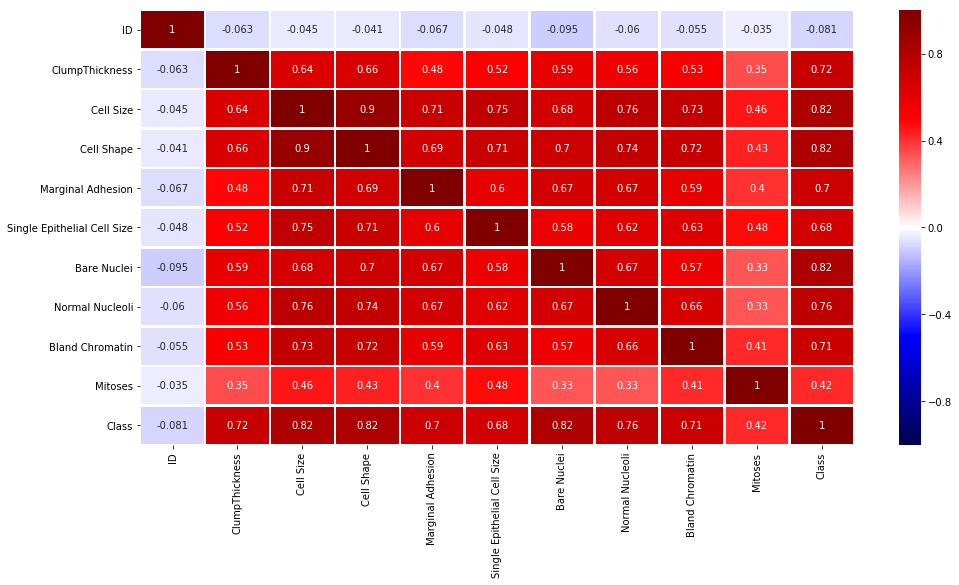

In [16]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic', linewidths=1.5)

In [17]:
# pair plot
#sns.pairplot(df, kind='reg')

####
if the valu of correlation is greater than 0 that means there is strong correlation between two veriable
and if the correlation value between two veriable is less than 0 that means there is negetive correlation.

values get 'cut' at 0, so I would like to have a map which goes from blue(-1) to red(1), or something like that,
but here values below 0 are not presented in an adequate way.

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

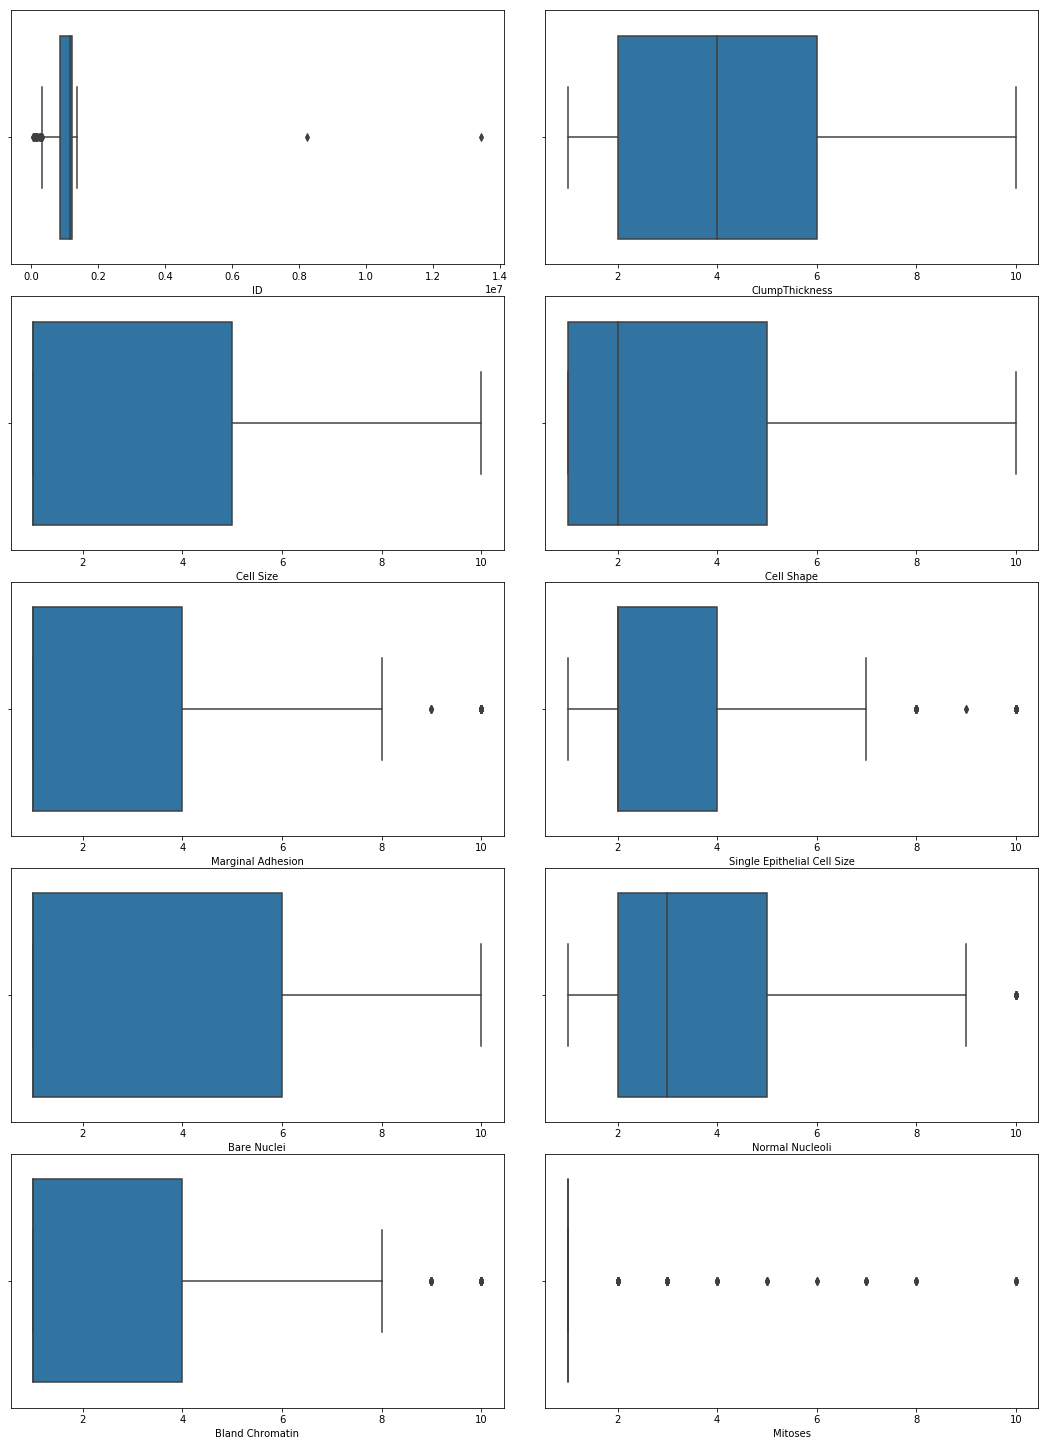

In [18]:
import matplotlib.pyplot as plt
df1 = df.select_dtypes([np.int64, np.float64])
f, axes = plt.subplots(nrows=5,ncols=2,figsize=(15,20))
f.tight_layout()
for ax, col in zip(axes.flatten(),df1.columns):
   sns.boxplot(df1[col],ax=ax)

In [19]:
#for i in list(range(1,df.shape[1])):
#    print(sns.boxplot(x=df.iloc[:,:i]))

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                             366637.0
ClumpThickness                      4.0
Cell Size                           4.0
Cell Shape                          4.0
Marginal Adhesion                   3.0
Single Epithelial Cell Size         2.0
Bare Nuclei                         5.0
Normal Nucleoli                     3.0
Bland Chromatin                     3.0
Mitoses                             0.0
Class                               2.0
dtype: float64


In [21]:
boston_df_out = df[(df < (Q3 + 1.5 * IQR)).any(axis=1)]
boston_df_out.shape

(645, 11)

In [22]:
HH = (Q3 + 1.5 * IQR)
#HH['Marginal Adhesion']
HH

ID                             1788141.5
ClumpThickness                      12.0
Cell Size                           11.0
Cell Shape                          11.0
Marginal Adhesion                    8.5
Single Epithelial Cell Size          7.0
Bare Nuclei                         13.5
Normal Nucleoli                      9.5
Bland Chromatin                      8.5
Mitoses                              1.0
Class                                7.0
dtype: float64

In [23]:
df['Marginal Adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

In [24]:
df.loc[df['Marginal Adhesion'] > 8.5, 'Marginal Adhesion'] = np.nan
df.fillna(8.5,inplace=True)

In [25]:
df['Marginal Adhesion'].unique()

array([ 1. ,  5. ,  3. ,  8. ,  8.5,  4. ,  6. ,  2. ,  7. ])

## Q6 Create a covariance matrix for identifying Principal components

In [26]:
#Removing columns class and ID since class is a target/dependant variable and wont be part of PCA
df.drop("ID" , axis=1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1.0,2,1.0,3,1,1,2
1,5,4,4,5.0,7,10.0,3,2,1,2
2,3,1,1,1.0,2,2.0,3,1,1,2
3,6,8,8,1.0,3,4.0,3,7,1,2
4,4,1,1,3.0,2,1.0,3,1,1,2
5,8,10,10,8.0,7,10.0,9,7,1,4
6,1,1,1,1.0,2,10.0,3,1,1,2
7,2,1,2,1.0,2,1.0,3,1,1,2
8,2,1,1,1.0,2,1.0,1,1,5,2
10,1,1,1,1.0,1,1.0,3,1,1,2


In [27]:
X = df.iloc[:,0:10].values
y = df.iloc[:,10].values
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [29]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [30]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00194175 -0.06417452 -0.0419249  -0.03400575 -0.06457654 -0.04283628
  -0.09243307 -0.06597004 -0.04680994 -0.03730828]
 [-0.06417452  1.00194175  0.66071865  0.66479217  0.50336659  0.51444993
   0.62347935  0.58796397  0.54605174  0.34102926]
 [-0.0419249   0.66071865  1.00194175  0.91598415  0.71579602  0.7525383
   0.70072596  0.77248638  0.72204887  0.46193243]
 [-0.03400575  0.66479217  0.91598415  1.00194175  0.6906186   0.72697733
   0.72002515  0.74481963  0.71255979  0.44154221]
 [-0.06457654  0.50336659  0.71579602  0.6906186   1.00194175  0.60554998
   0.69434116  0.68104963  0.59566167  0.36052754]
 [-0.04283628  0.51444993  0.7525383   0.72697733  0.60554998  1.00194175
   0.596785    0.63006582  0.61618789  0.50291826]
 [-0.09243307  0.62347935  0.70072596  0.72002515  0.69434116  0.596785
   1.00194175  0.69550647  0.56364832  0.36763802]
 [-0.06597004  0.58796397  0.77248638  0.74481963  0.68104963  0.63006582
   0.69550647  1.00194175  0.678

## Q7 Identify eigen values and eigen vector

In [31]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.03274267  0.99291591  0.06725922 -0.0059248  -0.02811291 -0.06983829
  -0.0343601   0.01472391  0.01725494  0.03352826]
 [ 0.30591191 -0.02605822  0.17326911  0.01143543 -0.84732082  0.01493966
   0.00839313 -0.25830679  0.30075548  0.01278517]
 [ 0.38067295  0.04326085  0.04187335 -0.73896932  0.040298    0.1581577
   0.20365907 -0.02485887 -0.28404725 -0.39493286]
 [ 0.37610503  0.04861703  0.06966284  0.65826071 -0.01385722  0.14297919
   0.2088406  -0.00568212 -0.48576529 -0.34317874]
 [ 0.33126882 -0.01705565  0.16807642  0.05682086  0.41214404 -0.44548181
  -0.20468817 -0.61197176  0.23196786 -0.14127723]
 [ 0.33463285  0.04558476 -0.21532734  0.04580677  0.21703321  0.12388277
   0.7013267  -0.02168039  0.33545812  0.41251312]
 [ 0.33765927 -0.0620724   0.21011928 -0.09064012 -0.07777024 -0.54764436
  -0.0675564   0.33983782 -0.38602879  0.5047109 ]
 [ 0.34951559 -0.00967966  0.20278353  0.08012857  0.15066244  0.06776901
  -0.22985005  0.64016985  0.51291694 

##  Q8 Find variance and cumulative variance by each eigen vector

In [32]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  59.48441229   69.49057417   77.38930989   82.63451934   87.2479957
   91.09644654   93.99842748   96.66842054   99.1902633   100.        ]


## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

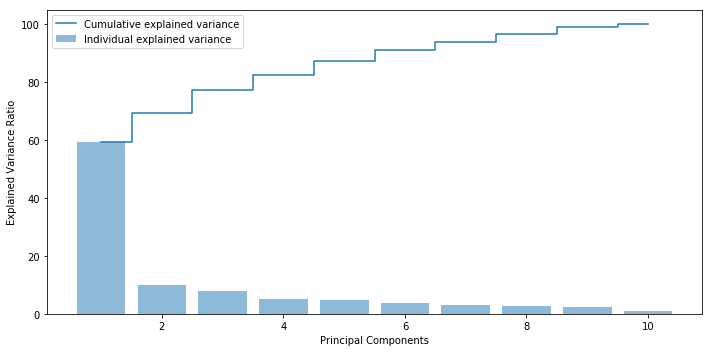

In [33]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [34]:
from sklearn import datasets
from sklearn.decomposition import PCA
X_reduced = pd.DataFrame(data = PCA(n_components=3).fit_transform(df))


In [37]:
#X_reduced
X_reduced.head()

,0,1,2
0,-74393.654260,-4.659026,-0.007867
1,-71473.654268,4.481759,-4.786775
2,-58993.654260,-4.815294,-0.600509
3,-58141.654266,4.955299,3.332074
4,-57395.654260,-4.341232,-0.071957


## Q10 Find correlation between components and features

In [38]:
X_reduced.corr()

,0,1,2
0,1.000000e+00,2.308622e-17,1.520146e-17
1,2.308622e-17,1.000000e+00,1.094110e-16
2,1.520146e-17,1.094110e-16,1.000000e+00


## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [39]:
df_svc = pd.read_csv("pima-indians-diabetes.csv",index_col=False)

In [40]:
df_svc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
print(df_svc.info())
print("---------------")
print(df_svc.describe())
print("---------------")
print(df_svc.shape)
print("---------------")
print(df_svc.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
---------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.00000

0    500
1    268
Name: Class, dtype: int64
--------


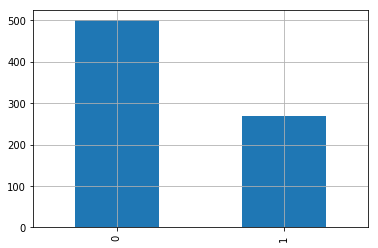

In [46]:
# Eye ball the imported dataset
df_svc['Class'].value_counts().plot(kind = 'bar', grid = True, stacked = True)
print(df_svc['Class'].value_counts())
print('--------')

### Check dimension of dataset

In [47]:
df_svc.shape

(768, 9)

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

   Class  count      prop
0      0    500  0.651042
1      1    268  0.348958


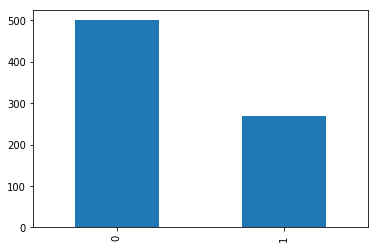

In [48]:
#Removing columns class and ID since class is a target/dependant variable and wont be part of PCA
#df_svc.drop(columns=['Class'],inplace=True)
## Target Variable Frequency Distribution
freq = df_svc['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)
df_svc['Class'].value_counts().plot('bar')

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [49]:
# Check data types and info of dataset
df_svc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Q3 Check data distribution using summary statistics and provide your findings

In [50]:
df_svc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

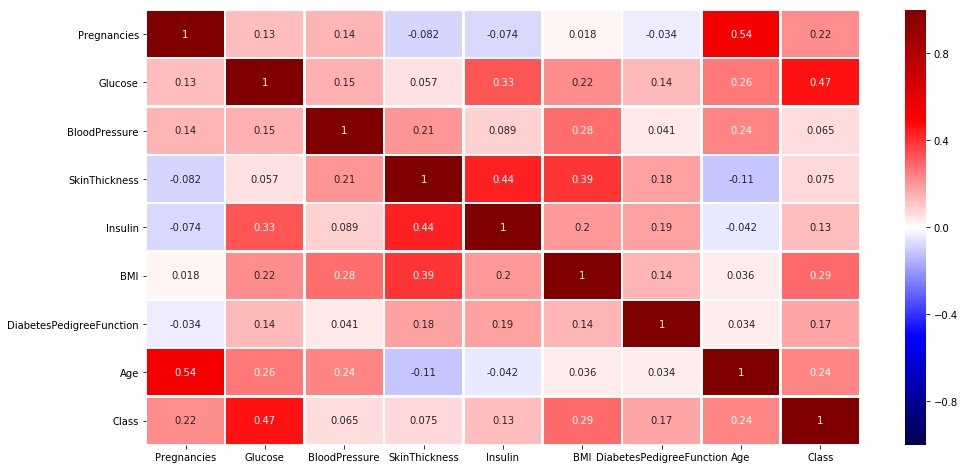

In [51]:
plt.figure(figsize = (16,8))
sns.heatmap(df_svc.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic', linewidths=1.5)

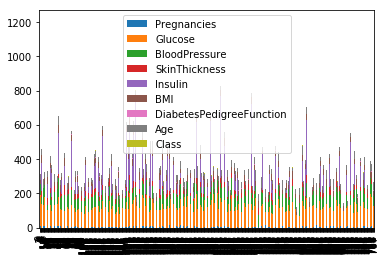

In [52]:
df_svc.plot.bar(stacked=True)

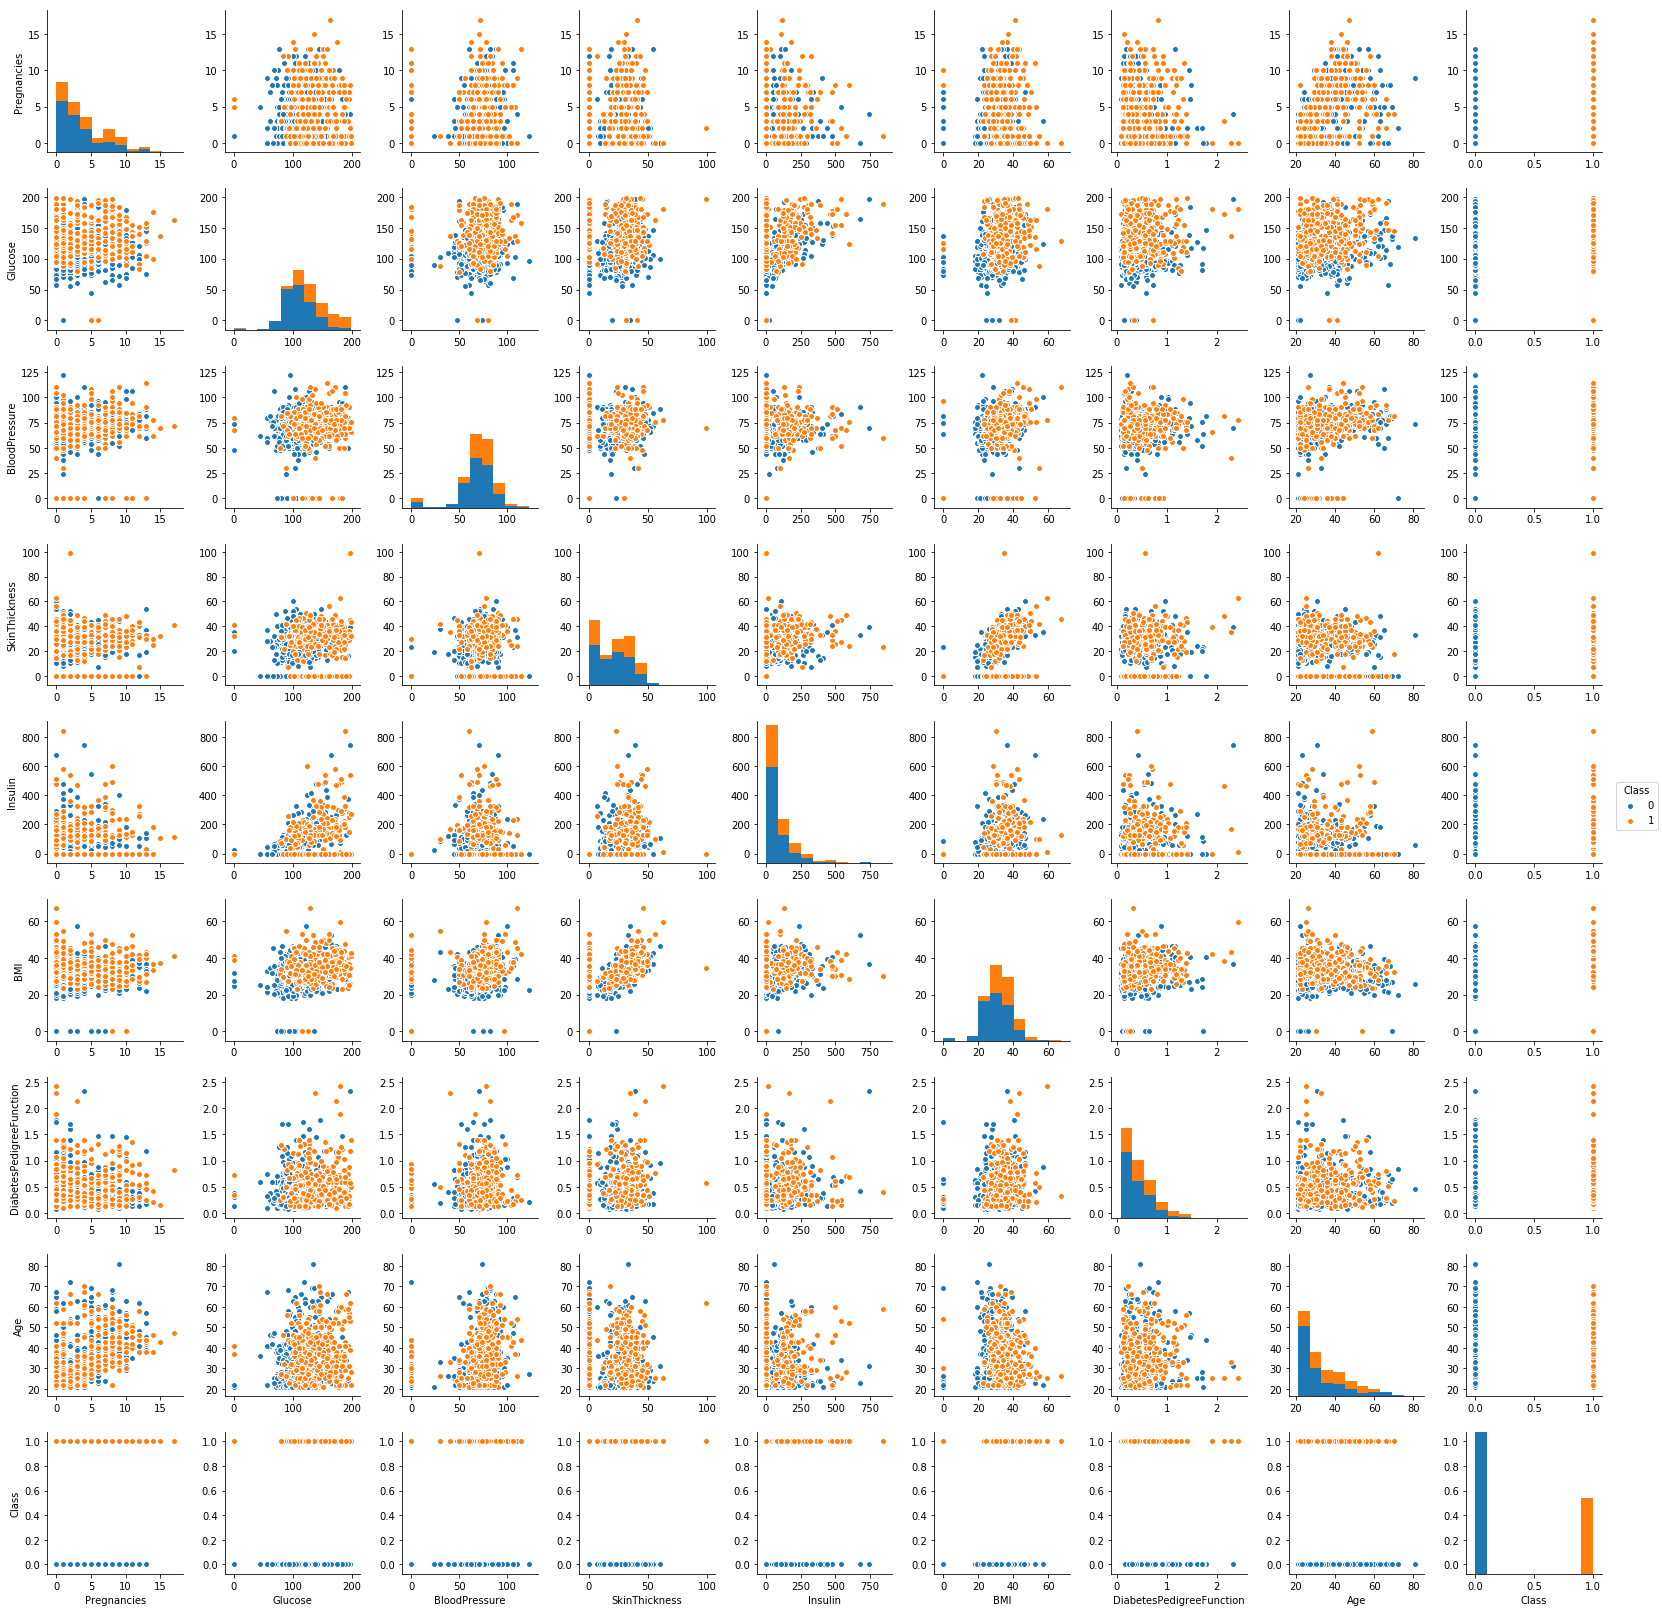

In [53]:
sns.pairplot(df_svc, hue="Class")

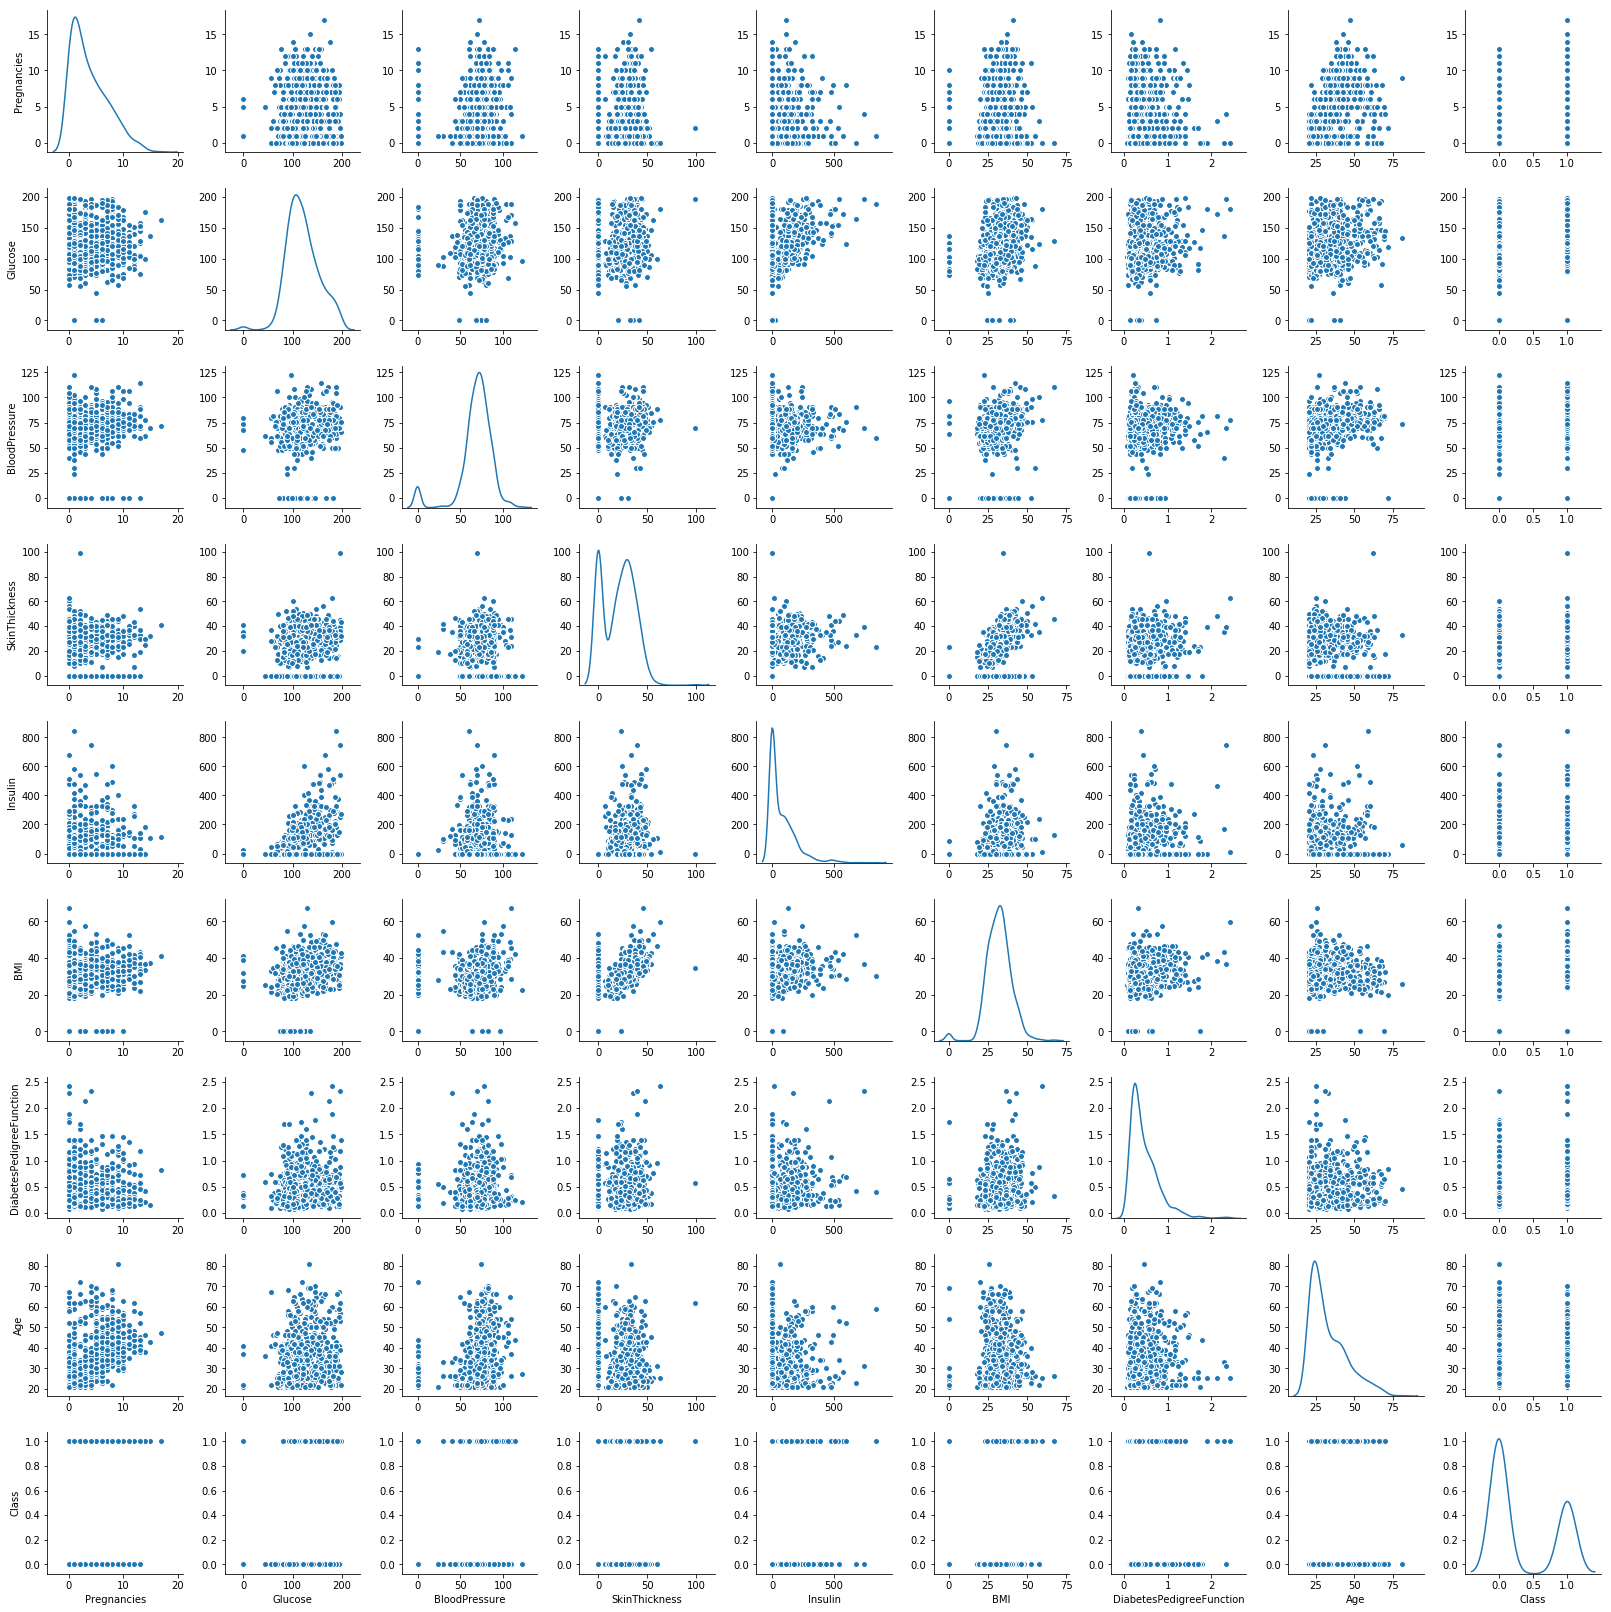

In [54]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(df_svc, diag_kind='kde') 

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [55]:
X,y = np.array(df_svc)[ :, 0:8], np.array(df_svc.Class)[:] 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Q5 Train Support Vector Machine Model(1 Marks)

In [57]:
# use from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC() 

In [58]:
# your insights
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.632034632035


####

observations : The model works well in training however fails in production. the acuuracy score has significantly reduced to 63.2 %
hence the model looks like overfitting

In [60]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0
row_0,
0,146
1,85


## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [61]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00186567  0.12955131  0.12311927 -0.10498786 -0.04169692 -0.01115871
  -0.03186088  0.52001682]
 [ 0.12955131  1.00186567  0.10832766  0.04665921  0.3423165   0.21794417
   0.12646706  0.26020058]
 [ 0.12311927  0.10832766  1.00186567  0.18085632  0.0920046   0.22018596
   0.01295307  0.21987868]
 [-0.10498786  0.04665921  0.18085632  1.00186567  0.4642682   0.39034765
   0.17424914 -0.15398256]
 [-0.04169692  0.3423165   0.0920046   0.4642682   1.00186567  0.21322923
   0.27226785 -0.08116915]
 [-0.01115871  0.21794417  0.22018596  0.39034765  0.21322923  1.00186567
   0.15477028  0.02975868]
 [-0.03186088  0.12646706  0.01295307  0.17424914  0.27226785  0.15477028
   1.00186567  0.03897485]
 [ 0.52001682  0.26020058  0.21987868 -0.15398256 -0.08116915  0.02975868
   0.03897485  1.00186567]]


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#y_train_scaled = scaler.fit_transform(y_train)
#y_test_scaled = scaler.fit_transform(y_test)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [65]:
clf.fit(X_train , y_train)
print("Training Score : ",clf.score(X_train_scaled, y_train))
print("Test Score scaled : ",clf.score(X_test_scaled, y_test))

print("Test Score : ",clf.score(X_test, y_test))

Training Score :  0.659217877095
Test Score scaled :  0.632034632035
Test Score :  0.632034632035


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [66]:
clf_Imp = svm.SVC(C=1000)
clf_Imp.fit(X_train_scaled , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
print("Training Score scaled : ",clf_Imp.score(X_train_scaled, y_train))
print("Test Score scaled: ",clf_Imp.score(X_test_scaled, y_test))

Training Score scaled :  0.800744878957
Test Score scaled:  0.787878787879


#### Comment

while trying to improve the performance of the model by changing the C value to 1000, i see that the model has improved and increase in the model accuracy has increased by 15%

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [74]:
import multiprocessing 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [75]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [81]:
gs = GridSearchCV(estimator=clf_Imp, param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [82]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [83]:
gs.best_estimator_

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
gs.best_score_ 

0.77467411545623832